In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/3Dsc/U2.5_b10.0/lDGAConfig.toml")
#include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

using Pkg; Pkg.activate(joinpath(@__DIR__, ".."));
using LadderDGA

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (14), wrong dep version loaded (4))


In [2]:
wp, mP, sP, env, kGridsStr = readConfig(ARGS[1]);
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env, silent=true);
bubble     = calc_bubble(:DMFT, lDGAhelper);
λ₀ = calc_λ0(bubble, lDGAhelper);
#χm_old, γm_old = LadderDGA.calc_χγ_old(:m, lDGAhelper, bubble, ω_symmetric=true);
#χd_old, γd_old = LadderDGA.calc_χγ_old(:d, lDGAhelper, bubble, ω_symmetric=true);

[ Info: Reading Inputs...
┌ Warning: [Debug] full_chi_omega setting not found. Assuming true
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\IO.jl:43
┌ Warning: Setting dbg_full_chi_omega = true can cause the magnetic correction to yield wrong results!!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\IO.jl:46
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45


DBG: NOT using diagonal terms in λ₀


┌ Warning: Threaded version of bubble calculation is not optimized and may only yield minor or no performance advantages.
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\BSETools.jl:185


DBG: NOT using diagonal terms in λ₀


In [3]:
LadderDGA.reset_timer!(LadderDGA.to)
@time χm, γm = LadderDGA.calc_χγ(:m, lDGAhelper, bubble, ω_symmetric=true);
@time χd, γd = LadderDGA.calc_χγ(:d, lDGAhelper, bubble, ω_symmetric=true);
χm2 = fix_χr(χm, negative_eps = 1e-2)
χd2 = fix_χr(χd, negative_eps = 1e-2);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.00026051491 ≟ 0
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
 17.102916 seconds (526.63 k allocations: 1.019 GiB, 0.41% gc time, 0.11% compilation time)
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000183784136 ≟ 0
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
 17.065852 seconds (516.92 k allocations: 1.018 GiB, 0.53% gc time)
┌ Warning: This will artificially invert the sign of all χ[q, ω₀] which are negative and close to zero AND set all χ[q, ω ≠ 0] to zero
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\BSETools.jl:480
┌ Warning: Alternatively, you may consider setting λmin explicitly to a small value.
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\BSETools.jl:481
┌ Warning: This will artificially invert the sign of all χ[q, ω₀] w

In [5]:
LadderDGA.reset_timer!(LadderDGA.to)
reset!(χm); reset!(χd);
xr_sc_full, yr_sc_full = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false, use_γ_symmetry=true);
#xr_sc_plain, yr_sc_plain = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
println(yr_sc_full)
LadderDGA.to

[-0.05470169611062341, 0.027249176235188563]


────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:      43.3s /   0.0%           4.97GiB /   0.0%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────

In [6]:
res_m      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_m);

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.03118090, λd = 0.00000000, μ = 1.24998167                            │
│  n      =  0.99999866,  n DMFT  =  0.99999866,  Δ = 0.0000%                  │
│  PP_1   =  0.25000000,  PP_2    =  0.25000000,  Δ = 0.0000%                  │
│  Epot_1 =  0.05766040,  Epot_2  =  0.05970474,  Δ = 1.7419%                  │
│  Ekin_1 =  -0.12265580,  Ekin_2  = -0.11232067,  Δ = 4.3984%                 │
│  χ_m    =  0.47611744,  χ_m_loc = 0.47576339,  Δ = 0.0372%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [7]:
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dm);

┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 2 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_dm_correction.jl:175
╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.03078856, λd = 3.67201052, μ = 1.24998175                            │
│  n      =  0.99999866,  n DMFT  =  0.99999866,  Δ = 0.0000%                  │
│  PP_1   =  0.25000000,  PP_2    =  0.25000000,  Δ = 0.0000%                  │
│  Epot_1 =  0.05729882,  Epot_2  =  0.05729882,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.12254718,  Ekin_2  = -0.11232067,  Δ = 4.3542%                 │
│  χ_m    =  0.47707980,  χ_m_loc = 0.47576339,  Δ = 0.1382%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [8]:
res_dmsc     = λdm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dmsc);

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03152742, λd = -2.85743025, μ = 1.24998920                           │
│  n      =  0.99999866,  n DMFT  =  0.99999866,  Δ = 0.0000%                  │
│  PP_1   =  0.25000000,  PP_2    =  0.25000000,  Δ = 0.0000%                  │
│  Epot_1 =  0.06181918,  Epot_2  =  0.06181873,  Δ = 0.0004%                  │
│  Ekin_1 =  -0.12793143,  Ekin_2  = -0.11232067,  Δ = 6.4977%                 │
│  χ_m    =  0.47527184,  χ_m_loc = 0.47576339,  Δ = 0.0517%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [7]:
LadderDGA.reset_timer!(LadderDGA.to)
reset!(χm); reset!(χd);
xr_sc_full, yr_sc_full = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false, use_γ_symmetry=false);
#xr_sc_plain, yr_sc_plain = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
println(yr_sc_full)
LadderDGA.to

[-0.054701510837807055, 0.027249361305954033]


────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:      32.7s /  95.3%           1.33GiB /  34.5%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
SE            29    31.2s  100.0%   1.08s    469MiB  100.0%  16.2MiB
────────────────────────────────────────────────────────────────────

In [8]:
LadderDGA.reset_timer!(LadderDGA.to)
reset!(χm); reset!(χd);
xr_sc_full, yr_sc_full = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
#xr_sc_plain, yr_sc_plain = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
println(yr_sc_full)
LadderDGA.to

[-0.054701510837807055, 0.027249361305954033]


────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:      32.8s /  92.5%           1.56GiB /  29.7%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
SE            29    30.3s  100.0%   1.05s    475MiB  100.0%  16.4MiB
────────────────────────────────────────────────────────────────────

In [52]:
all(se_new2 .≈ se_new)

true

In [53]:
se_new2 = calc_Σ_nb(χm, γm, χd, γd, λ₀, lDGAhelper);

286×100 OffsetArray(::Matrix{ComplexF64}, 1:286, 0:99) with eltype ComplexF64 with indices 1:286×0:99:
 0.415063-3.22654im  0.792279-1.35801im  …  1.24964-0.0300473im
 0.427908-3.23061im  0.799077-1.36076im     1.24965-0.0300474im
 0.440792-3.2346im   0.805909-1.36346im     1.24966-0.0300474im
 0.453717-3.23853im  0.812773-1.36613im     1.24966-0.0300475im
 0.465339-3.24219im  0.818933-1.36861im     1.24967-0.0300476im
 0.478338-3.24599im  0.825861-1.37119im  …  1.24967-0.0300477im
 0.491375-3.24972im   0.83282-1.37374im     1.24968-0.0300477im
  0.51621-3.2568im   0.846088-1.37857im     1.24969-0.0300479im
 0.529353-3.26033im  0.853137-1.38098im      1.2497-0.0300479im
 0.567632-3.27035im  0.873712-1.38785im     1.24971-0.0300481im
 0.524094-3.25959im  0.850234-1.38046im  …  1.24969-0.0300479im
 0.537264-3.26308im  0.857307-1.38285im      1.2497-0.030048im
 0.550469-3.2665im    0.86441-1.3852im       1.2497-0.0300481im
         ⋮                               ⋱  
  2.05894-3.23462im  

In [54]:
se_new = calc_Σ_nb(χm, γm, χd, γd, λ₀, lDGAhelper, use_γ_symmetry=true);

286×100 OffsetArray(::Matrix{ComplexF64}, 1:286, 0:99) with eltype ComplexF64 with indices 1:286×0:99:
 0.415063-3.22654im  0.792279-1.35801im  …  1.24964-0.0300473im
 0.427908-3.23061im  0.799077-1.36076im     1.24965-0.0300474im
 0.440792-3.2346im   0.805909-1.36346im     1.24966-0.0300474im
 0.453717-3.23853im  0.812773-1.36613im     1.24966-0.0300475im
 0.465339-3.24219im  0.818933-1.36861im     1.24967-0.0300476im
 0.478338-3.24599im  0.825861-1.37119im  …  1.24967-0.0300477im
 0.491375-3.24972im   0.83282-1.37374im     1.24968-0.0300477im
  0.51621-3.2568im   0.846088-1.37857im     1.24969-0.0300479im
 0.529353-3.26033im  0.853137-1.38098im      1.2497-0.0300479im
 0.567632-3.27035im  0.873712-1.38785im     1.24971-0.0300481im
 0.524094-3.25959im  0.850234-1.38046im  …  1.24969-0.0300479im
 0.537264-3.26308im  0.857307-1.38285im      1.2497-0.030048im
 0.550469-3.2665im    0.86441-1.3852im       1.2497-0.0300481im
         ⋮                               ⋱  
  2.05894-3.23462im  

In [55]:
se_new_old = calc_Σ_nb(χm, γm, χd, γd, λ₀, lDGAhelper, use_γ_symmetry=false)

286×100 OffsetArray(::Matrix{ComplexF64}, 1:286, 0:99) with eltype ComplexF64 with indices 1:286×0:99:
 0.415063-3.22654im  0.792279-1.35801im  …  1.24964-0.0300429im
 0.427908-3.23061im  0.799077-1.36076im     1.24965-0.0300429im
 0.440792-3.2346im   0.805909-1.36346im     1.24966-0.030043im
 0.453717-3.23853im  0.812773-1.36613im     1.24966-0.0300431im
 0.465339-3.24219im  0.818933-1.36861im     1.24967-0.0300432im
 0.478338-3.24599im  0.825861-1.37119im  …  1.24967-0.0300432im
 0.491375-3.24972im   0.83282-1.37374im     1.24968-0.0300433im
  0.51621-3.2568im   0.846088-1.37857im     1.24969-0.0300435im
 0.529353-3.26033im  0.853137-1.38098im      1.2497-0.0300435im
 0.567632-3.27035im  0.873712-1.38785im     1.24971-0.0300437im
 0.524094-3.25959im  0.850234-1.38046im  …  1.24969-0.0300435im
 0.537264-3.26308im  0.857307-1.38285im      1.2497-0.0300436im
 0.550469-3.2665im    0.86441-1.3852im       1.2497-0.0300436im
         ⋮                               ⋱  
  2.05894-3.23462im  

In [58]:
se_kint_old = kintegrate(lDGAhelper.kG, se_new_old, 1)[1,:]
se_kint_new = kintegrate(lDGAhelper.kG, se_new, 1)[1,:];

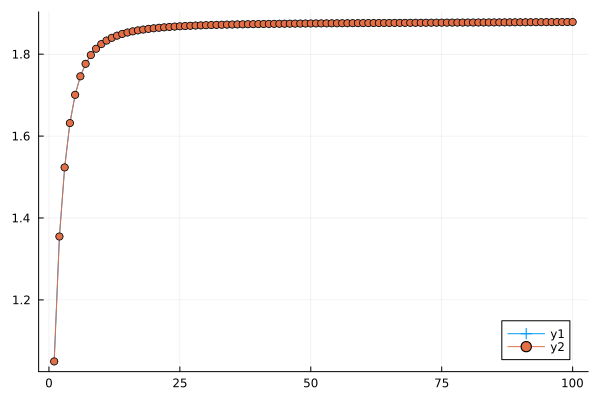

In [59]:
iν = iν_array(mP.β, collect(axes(se_new, 2)))
plot(real(iν .* se_kint_old.parent),markershape=:auto)
plot!(real(iν .* se_kint_new.parent),markershape=:auto)

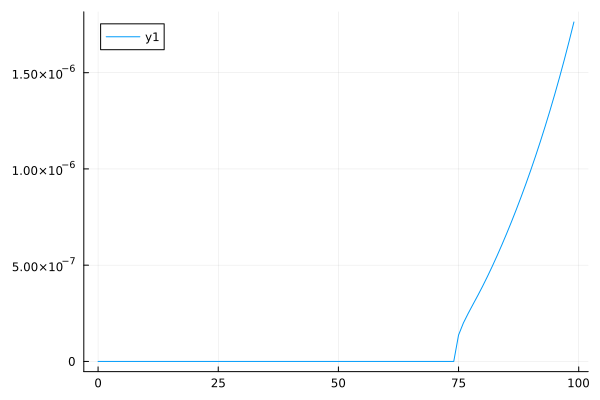

In [61]:
plot((abs.(se_kint_old .- se_kint_new) ./ abs.(se_kint_old .+ se_kint_new)))

In [8]:
LadderDGA.reset_timer!(LadderDGA.to)
reset!(χm); reset!(χd);
xr_sc_full, yr_sc_full = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
#xr_sc_plain, yr_sc_plain = EPotCond_sc_curve_nb(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=2, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
println(yr_sc_full)
LadderDGA.to

[-0.05470169611062341, 0.027249176235188563]


──────────────────────────────────────────────────────────────────────
                             Time                    Allocations      
                    ───────────────────────   ────────────────────────
 Tot / % measured:       36.6s /  97.8%           1.63GiB /  50.8%    

Section     ncalls     time    %tot     avg     alloc    %tot      avg
──────────────────────────────────────────────────────────────────────
01              29    34.4s   96.1%   1.19s    826MiB   97.2%  28.5MiB
  010           29    33.5s   93.7%   1.16s    525MiB   61.8%  18.1MiB
    0106c     873k    30.5s   85.4%  35.0μs    147MiB   17.3%     177B
  011           29    830ms    2.3%  28.6ms    295MiB   34.7%  10.2MiB
05              29    1.38s    3.9%  47.5ms   24.0MiB    2.8%   848KiB
  05c        34.8k    597ms    1.7%  17.1μs   1.06MiB    0.1%    32.0B
  05d2       34.8k    288ms    0.8%  8.28μs   5.31MiB    0.6%     160B
  05d1       34.8k   21.2ms    0.1%   609ns   14.1MiB    1.7%     423B
─────

In [44]:
ωn = -149
νi = 1
νi_shifted = νi + sP.n_iν + trunc(Int,ωn/2) 

77

In [137]:
ωi_0 = 151
for ωi in 151:165
    ωm = ωi - ωi_0
    ri = (ωi_0):(size(γm,2)-isodd(ωm))
    reverse_r = (ωi_0 - 1 - isodd(ωm)):(-1):1
    println("$ωm -> $ωi : $ri / $reverse_r")
    arr_m = λ₀[:,ri,ωi] .- conj.(λ₀[:,reverse_r,ωi])
    arr_p = λ₀[:,ri,ωi] .+ conj.(λ₀[:,reverse_r,ωi])
    val, ind = findmax(abs.(arr_m) ./ abs.(arr_p))
    val_abs, ind_abs = findmax(abs.(arr_m))
    #println("$(ind)")
    #println("$(ind[2]) ? $(ri[ind[2]]) / $(reverse_r[ind[2]])")
    println("$val_abs [$val %] @ $ind")
end

0 -> 151 : 151:300 / 150:-1:1
5.184222086020108e-9 [1.3752021427832132e-10 %] @ CartesianIndex(1, 6)
1 -> 152 : 151:299 / 149:-1:1
1.6694412592277495e-6 [0.0008088600181786669 %] @ CartesianIndex(226, 6)
2 -> 153 : 151:300 / 150:-1:1
9.19069823803204e-9 [0.0005083852936712576 %] @ CartesianIndex(84, 8)
3 -> 154 : 151:299 / 149:-1:1
1.734036675993195e-6 [0.0011292455446732603 %] @ CartesianIndex(233, 10)
4 -> 155 : 151:300 / 150:-1:1
4.894943434582884e-9 [7.862335243366572e-5 %] @ CartesianIndex(261, 11)
5 -> 156 : 151:299 / 149:-1:1
1.7372669197553681e-6 [0.0011838565267559542 %] @ CartesianIndex(251, 13)
6 -> 157 : 151:300 / 150:-1:1
3.9165405197755785e-9 [5.346968311357625e-5 %] @ CartesianIndex(11, 28)
7 -> 158 : 151:299 / 149:-1:1
1.7239450904258378e-6 [0.021942163036107867 %] @ CartesianIndex(6, 36)
8 -> 159 : 151:300 / 150:-1:1
3.526043191256896e-9 [8.934843648818308e-5 %] @ CartesianIndex(164, 17)
9 -> 160 : 151:299 / 149:-1:1
1.7106420223186078e-6 [0.01691891843424641 %] @ Cart

In [136]:
size(γm[:,1:νmid_ind,:])

(286, 150, 301)

In [132]:
νmid_ind = 150
γmt[:,1:νmid_ind,:] .- conj.(γmt[:,νmid_ind+1:end,:])

LoadError: UndefVarError: `γmt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [142]:
lDGAhelper.sP.n_iν

150

In [122]:
ωm = 1
νmid_ind = 151
νn = 0
νn_m = νmid_ind - νn - 1 - isodd(ωm)

149

In [105]:
abs(γm[1,151,164] .- conj.(γm[1,149,164])) / abs(γm[1,151,164] .+ conj.(γm[1,149,164]))

2.052634864397148e-10

In [138]:
λ₀[1,148:end,164]

153-element Vector{ComplexF64}:
   -0.09730973799204587 + 1.6418449311426667e-7im
   -0.09150483653040156 + 7.571405584917157e-8im
   -0.08971119165233622 - 4.5570963631826414e-10im
   -0.09150483618023345 - 7.604346930117803e-8im
   -0.09730973751742804 - 1.6450170586391007e-7im
   -0.10868331293291983 - 2.5223263729328734e-7im
   -0.12965580513198077 - 2.3988376143458633e-7im
   -0.17246804644511884 + 2.6613606119454045e-8im
   -0.32917407258905185 - 5.811216773162626e-6im
     0.2820729600607001 - 3.6404305227536724e-6im
    0.12497705473477688 + 2.797459521458708e-7im
    0.08116801616821638 - 2.4934839403636936e-7im
    0.05852630292003522 - 2.837063697873404e-7im
                        ⋮
  -7.428534867576393e-5 - 1.2059415607558815e-7im
  -7.676549514375706e-5 - 1.023449885534124e-7im
  -7.908998726488016e-5 - 7.550948123469707e-8im
  -8.127005941156035e-5 - 2.8652685254123143e-8im
   -8.33204114818447e-5 + 5.590812453802304e-8im
  -8.532116597182067e-5 + 1.2187534985433418e-7im

In [139]:
λ₀[1,151:-1:1,164]

151-element Vector{ComplexF64}:
  -0.09150483618023345 - 7.604346930117803e-8im
  -0.08971119165233622 - 4.5570963631826414e-10im
  -0.09150483653040156 + 7.571405584917157e-8im
  -0.09730973799204587 + 1.6418449311426667e-7im
  -0.10868331352508742 + 2.519263477643333e-7im
  -0.12965580582847136 + 2.395605547988224e-7im
  -0.17246804725629916 - 2.7066306939125827e-8im
  -0.32917407414243605 + 5.8102570558038705e-6im
   0.28207296537184606 + 3.639617032061435e-6im
    0.1249770587892506 - 2.803485712520769e-7im
   0.08116802019923262 + 2.489169246900814e-7im
   0.05852630714683203 + 2.8333200101497956e-7im
   0.04470421232288914 + 2.213412282944239e-7im
                       ⋮
 -7.156301150599426e-5 + 1.392537816409602e-7im
 -7.415425541833741e-5 + 1.2468542285594953e-7im
 -7.661476762371895e-5 + 1.0699545497516434e-7im
 -7.891363218872141e-5 + 8.080373081382292e-8im
 -8.105950254350645e-5 + 3.46741962476488e-8im
 -8.306307491855354e-5 - 4.9093677565159125e-8im
 -8.499810985862846e-5 

In [38]:
println(yr_sc_full)
LadderDGA.to

[-0.054701510837807124, 0.027249361305954276]


────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:      45.5s /  98.4%           10.1GiB /  92.1%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
01            29    43.4s   97.0%   1.50s   9.31GiB   99.8%   329MiB
  010         29    42.7s   95.3%   1.47s   9.02GiB   96.7%   318MiB
  011         29    717ms    1.6%  24.7ms    290MiB    3.0%  10.0MiB
05            29    1.34s    3.0%  46.1ms   23.9MiB    0.2%   842KiB
  05c      34.8k    574ms    1.3%  16.5μs   1.06MiB    0.0%    32.0B
  05d2     34.8k    264ms    0.6%  7.58μs   5.31MiB    0.1%     160B
  05d1     34.8k   16.5ms    0.0%   472ns   14.1MiB    0.1%     423B
────────────────────────────────────────────────────────────────────

In [9]:
println(yr_sc_full)
LadderDGA.to

LoadError: UndefVarError: `yr_sc_full` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [31]:
println(yr_sc_full)
LadderDGA.to

[-0.054701510837807235, 0.02724936130595388]


───────────────────────────────────────────────────────────────────────
                              Time                    Allocations      
                     ───────────────────────   ────────────────────────
  Tot / % measured:        292s /  13.3%           10.3GiB /  91.3%    

Section      ncalls     time    %tot     avg     alloc    %tot      avg
───────────────────────────────────────────────────────────────────────
01               29    37.6s   96.6%   1.29s   9.35GiB   99.8%   330MiB
  010            29    36.8s   94.8%   1.27s   9.05GiB   96.6%   320MiB
    0106c      855k    32.9s   84.7%  38.5μs    289MiB    3.0%     354B
      1000     855k    32.3s   83.2%  37.8μs   26.1MiB    0.3%    32.0B
  011            29    696ms    1.8%  24.0ms    290MiB    3.0%  10.0MiB
05               29    1.30s    3.4%  45.0ms   23.9MiB    0.2%   842KiB
  05c         34.8k    547ms    1.4%  15.7μs   1.06MiB    0.0%    32.0B
  05d2        34.8k    273ms    0.7%  7.83μs   5.31MiB    0.1% 

In [19]:
typeof(lDGAhelper.kG.fftw_plan)

FFTW.cFFTWPlan{ComplexF64, -1, true, 3, Tuple{Int64, Int64, Int64}}

In [16]:
LadderDGA.to

──────────────────────────────────────────────────────────────────────
                             Time                    Allocations      
                    ───────────────────────   ────────────────────────
 Tot / % measured:        535s /   7.9%           2.24GiB /  46.6%    

Section     ncalls     time    %tot     avg     alloc    %tot      avg
──────────────────────────────────────────────────────────────────────
01              29    40.8s   97.1%   1.41s   1.02GiB   97.9%  36.1MiB
  010           29    40.4s   96.1%   1.39s    837MiB   78.3%  28.8MiB
    0106c     855k    38.1s   90.5%  44.5μs    391MiB   36.6%     480B
  011           29    380ms    0.9%  13.1ms    209MiB   19.6%  7.22MiB
05              29    1.24s    2.9%  42.8ms   22.0MiB    2.1%   777KiB
  05c        34.8k    565ms    1.3%  16.2μs   1.06MiB    0.1%    32.0B
  05d2       34.8k    267ms    0.6%  7.67μs   5.31MiB    0.5%     160B
  05d1       34.8k   18.4ms    0.0%   528ns   14.1MiB    1.3%     423B
─────

In [10]:
function λdm_sc_correction_nb(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h;
                        νmax::Int = eom_ν_cutoff(h), tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = true,  λd_min::Float64 = NaN, λd_max::Float64 = 100.0, λd_δ::Float64 = 1e-2,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 1000, max_steps_dm::Int = 500, 
                        max_steps_sc::Int = 100, mixing::Float64=0.3, mixing_start_it::Int=10,
                        dbg_roots_reset::Int=4,
                        log_io = devnull, RF_Method=Roots.FalsePosition(), verbose::Bool=false, verbose_sc::Bool=false, trace=nothing)       

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end
    ωn2_tail = ω2_tail(χm)
    Nq, Nω = size(χm)
    νGrid = 0:(νmax-1)
    fft_νGrid= h.sP.fft_range

    Kνωq_pre    = Vector{ComplexF64}(undef, length(h.kG.kMult))
    G_ladder_it = OffsetArray(Matrix{ComplexF64}(undef, Nq, length(fft_νGrid)), 1:Nq, fft_νGrid) 
    G_ladder_bak = similar(G_ladder_it)
    Σ_ladder_it = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, νGrid)
    G_rfft = deepcopy(h.gLoc_rfft)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder_it, 2)))
    tc_factor_term = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν)
    μ_new = NaN
    λm = NaN
    converged = false

    function f_c2_sc(λd_i::Float64)
        @timeit LadderDGA.to "l01" copyto!(G_rfft, h.gLoc_rfft)
        @timeit LadderDGA.to "l02" rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i, PP_mode=tc != ΣTail_λm)
        @timeit LadderDGA.to "l03" λm   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        @timeit LadderDGA.to "l04" converged, μ_new = run_sc_nb!(G_ladder_it, Σ_ladder_it, G_ladder_bak, G_rfft, Kνωq_pre, tc_factor_term, tc, 
                χm, γm, χd, γd, λ₀, λm, λd_i, h; 
                maxit=max_steps_sc, conv_abs=validation_threshold, 
                mixing=mixing, mixing_start_it=mixing_start_it,
                verbose=verbose_sc, trace=trace)
        @timeit LadderDGA.to "l05" EPot_tail, EPot_tail_inv = LadderDGA.EPot_p1_tail(iν, μ_new, h)
        @timeit LadderDGA.to "l06" Epot_1 = EPot_p1(view(G_ladder_it,:,νGrid), view(Σ_ladder_it,:,νGrid), EPot_tail, EPot_tail_inv, h.mP.β, h.kG)
        @timeit LadderDGA.to "l07" Epot_2 = EPot_p2(χm, χd, λm, λd_i, h.mP.n, h.mP.U, h.kG)
        verbose && println("λm=$λm, λd=$λd_i, ΔEPot = $Epot_1 - $Epot_2 = $(Epot_1 - Epot_2)")
        return Epot_1 - Epot_2
    end    

    λd  = NaN
    i = 1
    done = false 
    λd_max_list = union([λd_max],
                        [λd_max + i * λd_max   for i in 1:trunc(Int,dbg_roots_reset/2)],
                        [λd_max - i * λd_max/(dbg_roots_reset)   for i in 1:trunc(Int,dbg_roots_reset/2)],
                        )

    while !done && i <= dbg_roots_reset+2 
        i += 1
        try 
            if i <= dbg_roots_reset
                @timeit LadderDGA.to "1a" λd = find_zero(f_c2_sc, (λd_min + λd_δ, λd_max_list[i]), RF_Method; atol=validation_threshold, maxiters=max_steps_dm)
                done = true
            elseif i == dbg_roots_reset+1
                @warn "Ran out of root resets, trying Newton_Secular"
                @timeit LadderDGA.to "1b" λd = newton_secular(f_c2_sc, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
                done = true
            elseif i == dbg_roots_reset+2
                @warn "Ran out of root resets, trying Newton_Right"
                @timeit LadderDGA.to "1c" λd = newton_right(f_c2_sc, λd_min+10.0, λd_min; nsteps=max_steps_dm, atol=validation_threshold, δ=1e-5)
                done = true
            else
                done = true
                @error "Ran Out of root finding methods!"
            end
        catch e
            @warn "Caught error: $e : ModelParameters $(h.mP) for range $λd_min + $λd_δ, $(i <= length(λd_max_list) ?  λd_max_list[i] : NaN)"
            @warn "Roots.find_zero sometimes failes due to numerical instability. Reseting $(dbg_roots_reset-i) more times"
        end
    end
    #λd  = newton_mode_secular ? newton_secular(f_c2_sc, λd_min; nsteps=max_steps_dm, atol=validation_threshold) :  newton_right(f_c2_sc, λd_min+10.0, λd_min; nsteps=max_steps_dm, atol=validation_threshold, δ=1e-7)
    
    @timeit LadderDGA.to "2" λm, converged = if isfinite(λd) && λd > λd_min
        rhs,PP_p1 = λm_rhs(χm, χd, h; λd=λd, PP_mode=tc != ΣTail_λm)
        λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
        converged, μ_new = run_sc_nb!(G_ladder_it, Σ_ladder_it, G_ladder_bak, G_rfft, Kνωq_pre, tc_factor_term, tc,
                    χm, γm, χd, γd, λ₀, λm, λd, h; maxit=max_steps_sc, conv_abs=validation_threshold,
                    mixing=mixing, mixing_start_it=mixing_start_it,
                    verbose=verbose_sc, trace=trace)
        λm, converged
    else
        NaN, false
    end
    
    
    return λ_result(dm_scCorrection, χm, χd, μ_new, G_ladder_it, Σ_ladder_it, λm, λd, converged, h; validation_threshold = validation_threshold, max_steps_m = max_steps_m)
end

λdm_sc_correction_nb (generic function with 1 method)

In [7]:
LadderDGA.to

────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:       107s /   0.0%           2.43GiB /   0.0%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────

In [11]:
LadderDGA.reset_timer!(LadderDGA.to)
reset!(χm); reset!(χd);
res_dmsc     = λdm_sc_correction_nb(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dmsc);
LadderDGA.to

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03152742, λd = -2.85743025, μ = 1.24998920                           │
│  n      =  0.99999866,  n DMFT  =  0.99999866,  Δ = 0.0000%                  │
│  PP_1   =  0.25000000,  PP_2    =  0.25000000,  Δ = 0.0000%                  │
│  Epot_1 =  0.06181918,  Epot_2  =  0.06181873,  Δ = 0.0004%                  │
│  Ekin_1 =  -0.12793143,  Ekin_2  = -0.11232067,  Δ = 6.4977%                 │
│  χ_m    =  0.47527184,  χ_m_loc = 0.47576339,  Δ = 0.0517%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


──────────────────────────────────────────────────────────────────────────
                                 Time                    Allocations      
                        ───────────────────────   ────────────────────────
   Tot / % measured:          173s /  99.8%           5.57GiB /  96.4%    

Section         ncalls     time    %tot     avg     alloc    %tot      avg
──────────────────────────────────────────────────────────────────────────
1a                   1     169s   98.3%    169s   5.30GiB   98.6%  5.30GiB
  l04                7     169s   98.1%   24.2s   5.28GiB   98.3%   773MiB
    01             118     164s   95.0%   1.39s   4.17GiB   77.7%  36.2MiB
      010          118     162s   94.0%   1.37s   3.32GiB   61.9%  28.8MiB
        0106c    3.48M     153s   88.7%  44.0μs   1.55GiB   28.9%     480B
      011          118    1.65s    1.0%  14.0ms    869MiB   15.8%  7.37MiB
    05             118    4.95s    2.9%  41.9ms   89.6MiB    1.6%   778KiB
      05c         142k  

In [4]:
reset!(χm); reset!(χd);
xr_sc_full, yr_sc_full = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm2,γm,χd2,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=20, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);
xr_sc_plain, yr_sc_plain = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm2,γm,χd2,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=20, λmin=LadderDGA.get_λ_min(χd)+1.0, λmax=100.0, verbose = false);

In [9]:
yr_sc_full

2-element Vector{Float64}:
 -0.054701517617885054
  0.027249354422123825

In [6]:
yr_sc_full

20-element Vector{Float64}:
 -0.054701517617885054
 -0.022422013135976956
 -0.009423499580609743
 -0.001473392741045798
  0.004096916128776676
  0.008300635759596234
  0.011627595575173455
  0.014365214702116866
  0.016650548509881978
  0.018604780576734127
  0.019481721996019587
  0.020301676889480945
  0.021793701382129896
  0.02311936664730413
  0.024307692089285418
  0.02485754220598233
  0.02538102936133091
  0.025880209581285306
  0.02635691986921279
  0.027249354422123825

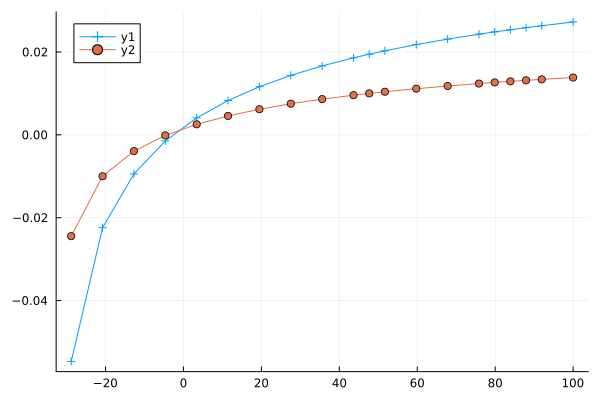

In [7]:
plot(xr_sc_full, yr_sc_full, markershape=:auto)
plot!(xr_sc_plain, yr_sc_plain, markershape=:auto)

In [8]:
res_dmsc     = λdm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dmsc);

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03152742, λd = -2.85743025, μ = 1.24998920                           │
│  n      =  0.99999866,  n DMFT  =  0.99999866,  Δ = 0.0000%                  │
│  PP_1   =  0.25000000,  PP_2    =  0.25000000,  Δ = 0.0000%                  │
│  Epot_1 =  0.06181918,  Epot_2  =  0.06181873,  Δ = 0.0004%                  │
│  Ekin_1 =  -0.12793143,  Ekin_2  = -0.11232067,  Δ = 6.4977%                 │
│  χ_m    =  0.47527184,  χ_m_loc = 0.47576339,  Δ = 0.0517%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [28]:
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dm);

┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 2 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_dm_correction.jl:175
┌ Error: Caught error: Roots.ConvergenceFailed("Algorithm failed to converge") : ModelParameters U=4.0, β=15.0, n=0.9999992397518348, μ=2.0
│ DMFT Energies: T=-0.06442723396417516, V=0.032718435279829094
│  for range 58370.89089852152 + 0.01, 400.0
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_dm_correction.jl:190
┌ Error: Setting λd = 0!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_dm_correction.jl:191
┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 1 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_dm_correction.jl:175
┌ Error: Caught error: Roots.ConvergenceFailed("Algorithm failed to converge") : ModelParameters U=4.0, β=15.0, n=0.9999992397

In [4]:
@time χm2, γm2 = LadderDGA.calc_χγ(:m, lDGAhelper, bubble, ω_symmetric=true, use_threads=true);
@time χd2, γd2 = LadderDGA.calc_χγ(:d, lDGAhelper, bubble, ω_symmetric=true, use_threads=true);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.001142716936 ≟ 0
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
  1.422460 seconds (113.48 k allocations: 117.644 MiB, 49.10% compilation time)
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000700908361 ≟ 0
┌ Warning: The find_usable_range function should not be used carefully the DMFT phase transition. PLEASE FIX THIS!
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFFit.jl:45
  1.347805 seconds (39.12 k allocations: 113.961 MiB, 2.16% gc time)


In [5]:
@info maximum(abs.(χm .- χm2))
@info maximum(abs.(χd .- χd2))
@info maximum(abs.(γm .- γm2))
@info maximum(abs.(γd .- γd2))

[ Info: 2.842170943040401e-14
[ Info: 9.54097911787244e-16
[ Info: 1.6431301108201747e-14
[ Info: 9.860168237645437e-14


In [6]:
res_m      = λm_correction(χm2, γm2, χd2, γd2, λ₀, lDGAhelper); print(res_m);
res_dm     = λdm_correction(χm2, γm2, χd2, γd2, λ₀, lDGAhelper); print(res_dm);

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.10852026, λd = 0.00000000, μ = 0.96690855                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.10427692,  Epot_2  =  0.12356106,  Δ = 8.4640%                  │
│  Ekin_1 =  -0.22385555,  Ekin_2  = -0.20903607,  Δ = 3.4234%                 │
│  χ_m    =  0.43723579,  χ_m_loc = 0.43558908,  Δ = 0.1887%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 2 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_dm_correction.jl:175
╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ──

In [7]:
res_dmsc     = λdm_sc_correction(χm2, γm2, χd2, γd2, λ₀, lDGAhelper); print(res_dmsc);

┌ Warning: Caught error: UndefVarError(:to, LadderDGA.LambdaCorrection) : ModelParameters U=2.0, β=20.0, n=0.9980326521345236, μ=1.0
│ DMFT Energies: T=-0.20903607116961398, V=0.12689328518412424
│  for range -9.926757780744543 + 0.01, 200.0
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:172
┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 2 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:173
┌ Warning: Caught error: UndefVarError(:to, LadderDGA.LambdaCorrection) : ModelParameters U=2.0, β=20.0, n=0.9980326521345236, μ=1.0
│ DMFT Energies: T=-0.20903607116961398, V=0.12689328518412424
│  for range -9.926757780744543 + 0.01, 300.0
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:172
┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 1 more times
└ @ LadderDGA.Lamb

In [8]:
LadderDGA.to

────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:      61.6s /   0.0%           3.29GiB /   0.0%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────

In [22]:
λmax = 50.0
xr_naive, yr_naive = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false)
xr_full, yr_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false)
xr_es1, yr_es1 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.001}, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false);
#xr_es2, yr_es2 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.01}, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false);
#xr_es3, yr_es3 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.05}, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false);
#xr_es4, yr_es4 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.1}, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false);
#xr_es5, yr_es5 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.4}, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false);
xr_es6, yr_es6 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.8}, maxit=20, λmin=LadderDGA.get_λ_min(χd), λmax=λmax, verbose = false)

([50.0, 11187.943428550414, 16756.915142825623, 19541.400999963225, 20933.643928532027, 21629.76539281643, 21977.82612495863, 22151.85649102973, 22238.871674065278, 22282.379265583055, 22304.13306134194, 22315.009959221385, 22320.448408161108, 22323.167632630968, 22324.527244865898, 22325.207050983365, 22325.546954042096, 22325.716905571462, 22325.801881336145, 22325.886857100828], [-0.5777504775883703, -0.5670261407247204, -0.5667673970487945, -0.5666839225116964, -0.5666489551165248, -0.5666327865049303, -0.5666249044331342, -0.5666208223440271, -0.5666183696680672, -0.5666162884956725, -0.5666135304408869, -0.5666087145164549, -0.5665994321833498, -0.5665810417775946, -0.5665443465584526, -0.5664709928788285, -0.5663242797856314, -0.5660307543548776, -0.5654432689119278, 4.7068215665830575e7])

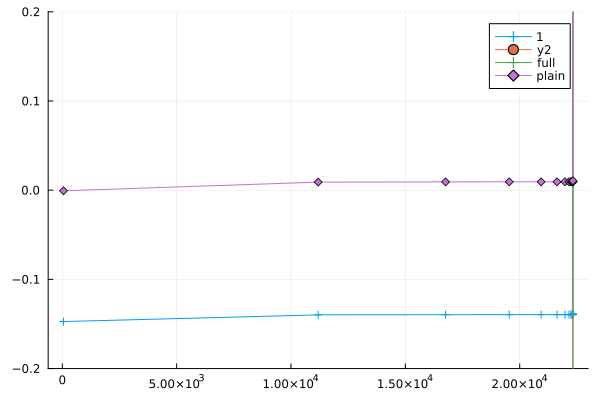

In [23]:
plot(xr_es1, yr_es1,markershape=:auto, label="1", ylims=(-0.2,0.2))
#plot!(xr_es2, yr_es2,markershape=:auto)
#plot!(xr_es3, yr_es3,markershape=:auto)
#plot!(xr_es4, yr_es4,markershape=:auto)
#plot!(xr_es5, yr_es5,markershape=:auto)
plot!(xr_es6, yr_es6,markershape=:auto)
plot!(xr_full, yr_full,markershape=:auto, label="full")
plot!(xr_naive, yr_naive,markershape=:auto, label="plain")

In [67]:
xr_naive, yr_naive = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Plain, maxit=200, λmin=LadderDGA.get_λ_min(χd), λmax=100.0, verbose = false);

In [68]:
xr_full, yr_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; tc=ΣTail_Full, maxit=200, λmin=LadderDGA.get_λ_min(χd), λmax=100.0, verbose = false)

([100.0, NaN], [NaN, NaN])

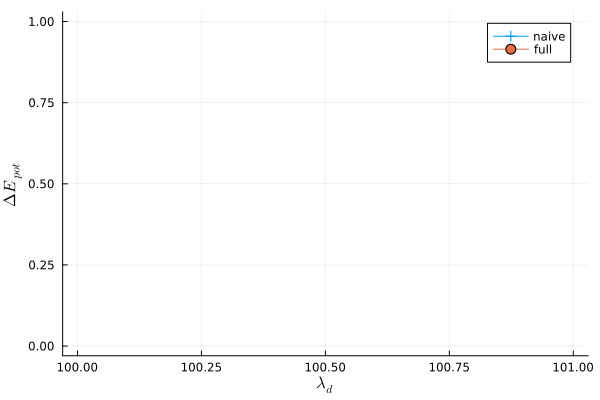

In [71]:
p = Plots.plot(xr_naive, yr_naive,markershape=:auto, label="naive", xlabel=L"\lambda_d", ylabel=L"\Delta E_{pot}")
Plots.plot!(xr_full, yr_full,markershape=:auto, label="full")
display(p)

In [9]:
pp_curves = []
for λd_i in xr_naive
    tmp_curve = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd, γd,λ₀, lDGAhelper; λd=λd_i,
        tc=ΣTail_Full, maxit=200, λmax=10.0)
    push!(pp_curves, tmp_curve)
end

In [ ]:
ii = 21
plot(pp_curves[ii][1],pp_curves[ii][2], markershape=:auto, label="λd = $(xr_naive[ii])",ylims=(-1,1))

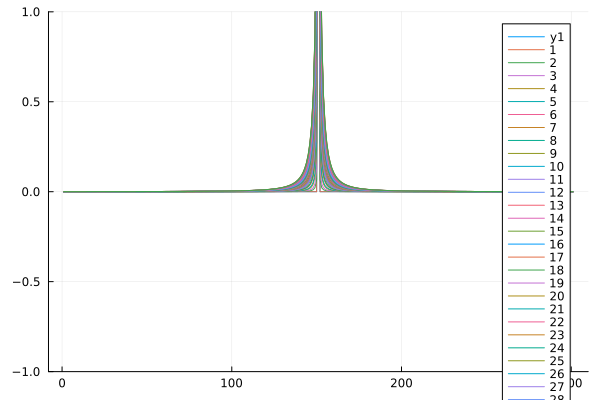

In [37]:
p = plot(χm[1,:], ylims=(-1,1))
for i in 1:size(χm,1)
    plot!(p, χm[i,:], label="$i")
end
display(p)

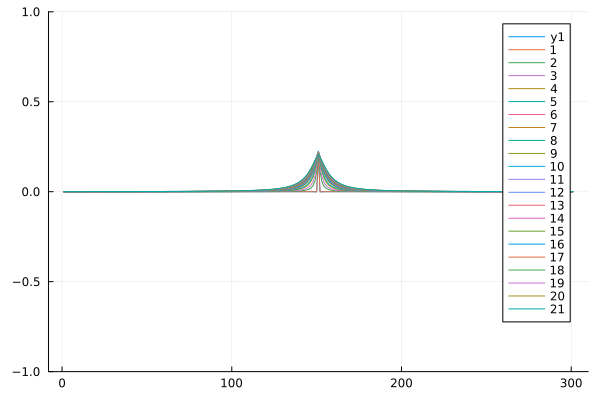

In [12]:
p = plot(χd[1,:], ylims=(-1,1))
for i in 1:size(χd,1)
    plot!(p, χd[i,:], label="$i")
end
display(p)

In [44]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

In [45]:
ω2 = [-((2*n)*π/lDGAhelper.mP.β)^2 for n in -lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω];
ttt = kintegrate(lDGAhelper.kG, χm, 1)[1,:];
ttt2 = kintegrate(lDGAhelper.kG, χd, 1)[1,:];
#hline!([lDGAhelper.mP.Ekin_1Pt], label=L"E_\mathrm{kin}")

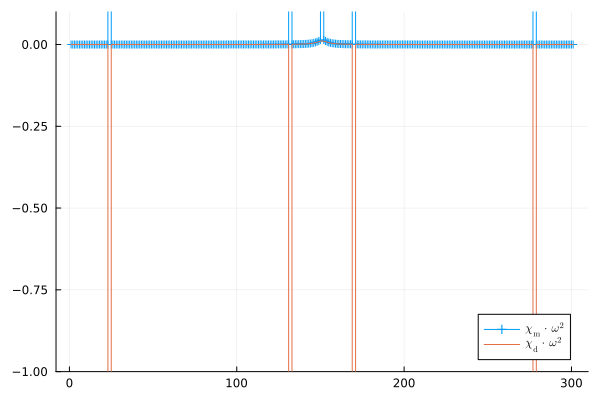

In [46]:
plot(ttt, label=L"\chi_\mathrm{m} \cdot \omega^2", ylims=(-1,0.1), markershape=:auto)
plot!(ttt2, label=L"\chi_\mathrm{d} \cdot \omega^2")

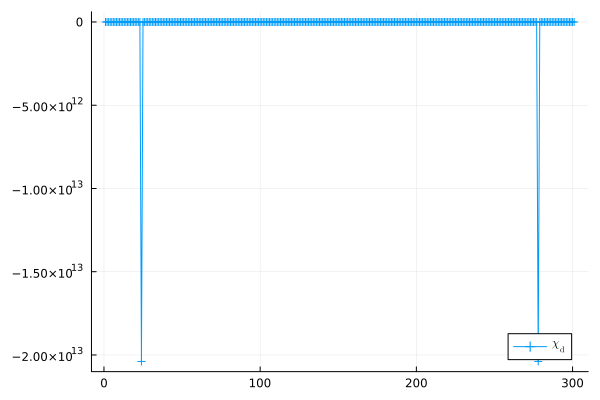

In [47]:
plot(ttt2, label=L"\chi_\mathrm{d}",  markershape=:auto)

In [5]:
Nk = LadderDGA.Nk
function calc_λud_ward(bubble::χ₀T, χm::χT, χd::χT, γm::γT, γd::γT, h::lDΓAHelper, env; λm = 0.0, λd = 0.0, GF = h.gLoc, max_Nk::Int = h.kG.Ns, χm_star_gen = nothing, χd_star_gen = nothing)

    lDGAhelper_Ur = deepcopy(lDGAhelper)
    lDGAhelper_Ur.Γ_m[:, :, :] = lDGAhelper_Ur.Γ_m[:, :, :] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
    lDGAhelper_Ur.Γ_d[:, :, :] = lDGAhelper_Ur.Γ_d[:, :, :] .- (lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
    χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG)
    χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG);
    
    if isnothing(χm_star_gen) || isnothing(χd_star_gen)
        lDGAhelper_Ur = deepcopy(h)
        lDGAhelper_Ur.Γ_m[:, :, :] = lDGAhelper_Ur.Γ_m[:, :, :] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
        lDGAhelper_Ur.Γ_d[:, :, :] = lDGAhelper_Ur.Γ_d[:, :, :] .- (lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
        χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG)
        χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG)
    end
    χ_λ!(χm, λm)
    Fm = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -h.mP.U)
    reset!(χm)
    χ_λ!(χd, λd)
    Fd = F_from_χ_star_gen(bubble, χd_star_gen, χd, γd, h.mP.U)
    reset!(χd)
    println(size(Fm))
    ν_m1 = trunc(Int, size(Fm,1)/2)
    ω_1 = trunc(Int, size(Fm,4)/2)+2
    q0 = 1
    println("ν_m1 = $ν_m1 / ω_1 = $ω_1")
    res = 0.0
    for kp in 1:size(GF,1)
        res += sum(0.5 .* (Fd[ν_m1,:,q0,ω_1] - Fm[ν_m1,:,q0,ω_1] ) .* GF[kp,-h.sP.n_iν:(h.sP.n_iν-1)] .* GF[kp,(-h.sP.n_iν+1):(h.sP.n_iν)])/h.mP.β
    end
    res = res*(π/h.mP.β)/(Nk(h.kG))
end

calc_λud_ward (generic function with 1 method)

In [6]:
F_m = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β)
F_d = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β)
xr1 = -lDGAhelper.sP.n_iν:(lDGAhelper.sP.n_iν-1)
xr2 = (-lDGAhelper.sP.n_iν+1):(lDGAhelper.sP.n_iν)
    ν_m1 = trunc(Int, size(F_m,1)/2)
    ω_1 = trunc(Int, size(F_m,3)/2)+2
    res = 0.0
    for kp in 1:size(lDGAhelper.gImp,1)
        res += sum( 0.5 .* (F_d[:,ν_m1,ω_1]  .- F_m[:,ν_m1,ω_1] ) .* lDGAhelper.gImp[1, xr1] .* lDGAhelper.gImp[1, xr2] )/lDGAhelper.mP.β
    end

    for kp in 1:size(lDGAhelper.gImp,1)
        res += sum( 0.5 .* (F_d[:,ν_m1,ω_1]  .+ F_m[:,ν_m1,ω_1] ) .* lDGAhelper.gImp[1, xr1] .* lDGAhelper.gImp[1, xr2] )/lDGAhelper.mP.β
    end

In [7]:
KGrid = LadderDGA.KGrid
expandKArr = LadderDGA.expandKArr
grid_dimension = LadderDGA.grid_dimension
gridPoints = LadderDGA.gridPoints
gen_ϵkGrid = LadderDGA.Dispersions.gen_ϵkGrid
grid_type = LadderDGA.grid_type
gridshape = LadderDGA.gridshape
reduceKArr = LadderDGA.reduceKArr
function ϵ_k_plus_q(kG::KGrid, q::NTuple)
    if grid_dimension(kG) != length(q)
        throw(ArgumentError("Grid dimension differs from shift dimension!"))
    else
        k_plus_q = map(ki -> ki .+ q, expandKArr(kG, gridPoints(kG))[:])
        return gen_ϵkGrid(grid_type(kG), k_plus_q, kG.t, kG.tp, kG.tpp)
    end
end

function ϵ_k_minus_q(kG::KGrid, q::NTuple)
    if grid_dimension(kG) != length(q)
        throw(ArgumentError("Grid dimension differs from shift dimension!"))
    else
        k_minus_q = map(ki -> ki .- q, expandKArr(kG, gridPoints(kG))[:])
        return gen_ϵkGrid(grid_type(kG), k_minus_q, kG.t, kG.tp, kG.tpp)
    end
end

ϵ_k_minus_q (generic function with 1 method)

In [8]:
ina = LadderDGA.iν_array(lDGAhelper.mP.β, collect(axes(lDGAhelper.gLoc,2)))

    e_kg = expandKArr(lDGAhelper.kG, lDGAhelper.kG.ϵkGrid)
res = 0.0
res_q_l = []
res_ekq_l = []
for qi in axes(lDGAhelper.gLoc,1)
    
    #push!(res_q,sum(lDGAhelper.gLoc[qi,:].parent)/lDGAhelper.mP.β )
    qv = lDGAhelper.kG.kGrid[qi]
    e_kg_pq = reshape(ϵ_k_plus_q(lDGAhelper.kG, qv),gridshape(lDGAhelper.kG));
    e_kg_mq = reshape(ϵ_k_plus_q(lDGAhelper.kG, qv),gridshape(lDGAhelper.kG));
    rr = -(2 .* e_kg .- e_kg_pq .- e_kg_mq)
    rr_red = reduceKArr(lDGAhelper.kG, rr)
    res_ekq = kintegrate(lDGAhelper.kG, rr_red)

    push!(res_q_l,2*real(sum(lDGAhelper.gLoc[qi,:].parent .- 1 ./ ina)/(lDGAhelper.mP.β) .+ 0.5)*(lDGAhelper.kG.kMult[qi]/Nk(kG)))
    push!(res_ekq_l, res_ekq)
    res += res_q_l[end]
end
res

0.8328259441624902

In [9]:
nm = 2*lDGAhelper.sP.n_iν
vr = -lDGAhelper.sP.n_iν:(lDGAhelper.sP.n_iν-1) 
vr_p1 = (-lDGAhelper.sP.n_iν+1):(lDGAhelper.sP.n_iν) 
sum((res_dm.G_ladder[1,vr_p1] - res_dm.G_ladder[1,vr] ) .* lDGAhelper.Γ_m[1:(end-1),151,152])/lDGAhelper.mP.β

LoadError: UndefVarError: `res_dm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [10]:
wi = 1
vr = -lDGAhelper.sP.n_iν:(lDGAhelper.sP.n_iν-1) 
vr_p1 = (-lDGAhelper.sP.n_iν+wi):(lDGAhelper.sP.n_iν-1+wi) 
sum((lDGAhelper.gLoc[1,vr_p1] - lDGAhelper.gLoc[1,vr] ) .* lDGAhelper.Γ_m[:,151,151+wi])/lDGAhelper.mP.β

7.733206955971542e-5 - 9.928835887224891e-5im

In [11]:
lDGAhelper.Σ_loc[1] .- lDGAhelper.Σ_loc[0]

-0.044655691810350895 - 0.12434478172684865im

In [12]:
res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.03473254, λd = -1.19910172, μ = 0.31348461                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.08305480,  Epot_2  =  0.08305480,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27820029,  Ekin_2  = -0.26047556,  Δ = 3.2904%                 │
│  χ_m    =  0.37337564,  χ_m_loc = 0.38383441,  Δ = 1.3812%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [13]:
res_m =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.29877351                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07762499,  Epot_2  =  0.05669002,  Δ = 15.5865%                 │
│  Ekin_1 =  -0.27297436,  Ekin_2  = -0.26047556,  Δ = 2.3430%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [14]:
res_m =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full, PP_mode=true)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.21216731                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07330256,  Epot_2  =  0.05669002,  Δ = 12.7796%                 │
│  Ekin_1 =  -0.28722210,  Ekin_2  = -0.26047556,  Δ = 4.8835%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [15]:
res_m2 =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full, PP_mode=false)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 2.36446407, λd = 0.00000000, μ = 0.45971744                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.11390583,  Δ = 36.1272%                 │
│  Epot_1 =  -0.00345965,  Epot_2  =  0.31439537,  Δ = 102.2253%               │
│  Ekin_1 =  -0.14123233,  Ekin_2  = -0.26047556,  Δ = 29.6841%                │
│  χ_m    =  0.12885267,  χ_m_loc = 0.38383441,  Δ = 49.7344%                  │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [16]:
res_m_NoPP =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm, PP_mode=true)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.22641398                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.06148414,  Epot_2  =  0.05669002,  Δ = 4.0568%                  │
│  Ekin_1 =  -0.27351208,  Ekin_2  = -0.26047556,  Δ = 2.4414%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [17]:
res_m_NoPP2 =  LadderDGA.LambdaCorrection.λm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_λm, PP_mode=false)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 2.36446407, λd = 0.00000000, μ = 0.62745206                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.11390583,  Δ = 36.1272%                 │
│  Epot_1 =  0.41379016,  Epot_2  =  0.31439537,  Δ = 13.6497%                 │
│  Ekin_1 =  -0.51067892,  Ekin_2  = -0.26047556,  Δ = 32.4453%                │
│  χ_m    =  0.12885267,  χ_m_loc = 0.38383441,  Δ = 49.7344%                  │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [18]:
μ_new_Full1, G_ladder_Full1, Σm_Full1 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m.λm, 0.0, lDGAhelper; tc=ΣTail_Full, fix_n = true)
μ_new_Full2, G_ladder_Full2, Σm_Full2 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m2.λm, 0.0, lDGAhelper; tc=ΣTail_Full, fix_n = true)

μ_new_λT1, G_ladder_λT1, Σm_λT1 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m_NoPP.λm, 0.0, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
μ_new_λT2, G_ladder_λT2, Σm_λT2 = calc_G_Σ(χm, γm, χd, γd, λ₀, res_m_NoPP2.λm, 0.0, lDGAhelper; tc=ΣTail_Plain, fix_n = true);

In [19]:
xms = sum_kω(lDGAhelper.kG, χm, λ=res_m_NoPP.λm)
xds = sum_kω(lDGAhelper.kG, χd, λ=0.0)

0.09895898434970114

In [20]:
3*xms + xds

1.2586330742007965

In [21]:
lim_se / 2

0.48551701432226185

In [22]:
rhs, PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper; λ_rhs = :native, PP_mode=true, verbose=true)

[ Info: λsp correction infos:
[ Info:   ↳ using n * (1 - n/2) - Σ χd as rhs
┌ Info:   ↳ Found usable intervals for non-local susceptibility of length 
│   ↳ sp: 1:301, length: 301
│   ↳ ch: 1:301, length: 301
└ ↳ χd sum = 0.09895898434970114, rhs = 0.3865580299725607


(0.3865580299725607, 0.24275850716113093)

In [23]:
lim_se_test = 2 * (nden/2) * (1 - nden/2) - xds

0.3865580299725607

In [24]:
lim_se/2

0.48551701432226185

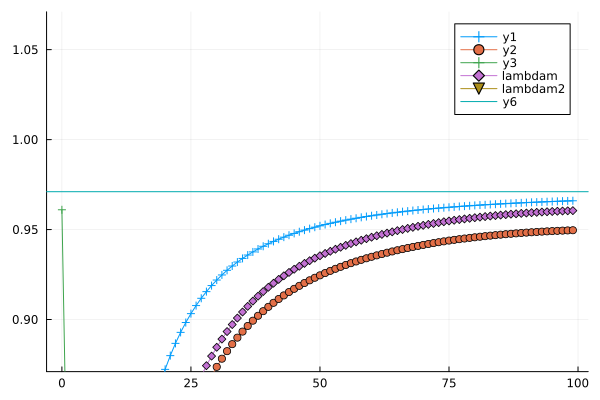

In [27]:
xr = collect(axes(Σm_Full1,2))
λ0_sum = -sum(kintegrate(lDGAhelper.kG,λ₀, 1),dims=3)[1,151:250,1] ./ (lDGAhelper.mP.β * lDGAhelper.mP.U * 0.5)
iν_arr = LadderDGA.iν_array(lDGAhelper.mP.β, xr)
lim_se = lDGAhelper.mP.U^2 * (lDGAhelper.mP.n/2) * (1 - lDGAhelper.mP.n/2)
ylims = (lim_se-0.1, lim_se+0.1)

plot(xr, real(lDGAhelper.Σ_loc[0:99,1] .* iν_arr), markershape=:auto, ylims=ylims)
plot!(xr, real((Σm_Full1[1,0:99,1]) .* iν_arr), markershape=:auto)
plot!(xr, real((Σm_Full2[1,0:99,1]) .* iν_arr), markershape=:auto)
plot!(xr, real((Σm_λT1[1,0:99,1]) .* iν_arr), markershape=:auto, label="lambdam")
plot!(xr, real((Σm_λT2[1,0:99,1]) .* iν_arr), markershape=:auto, label="lambdam2")
#plot!(xr, real(λ0_sum .* iν_arr), markershape=:auto, label="l0")
hline!([lim_se, - lim_se, 3lim_se])

In [26]:
rhs, PP_p1 = λm_rhs(χm, χd, h; λ_rhs = :native, PP_mode=(tc != ΣTail_λm), verbose=verbose)
res_m2 =  LadderDGA.LambdaCorrection.λm_correction_val2()

LoadError: UndefVarError: `tc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [27]:
res_dm.Σ_ladder[2,:] .- res_dm.Σ_ladder[1,:] = lDGAhelper.

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://G:/Codes/LadderDGA.jl/notebooks/In[27]#1:59\[90mIn[27]:1:59[0;0m]8;;\
res_dm.Σ_ladder[2,:] .- res_dm.Σ_ladder[1,:] = lDGAhelper.[48;2;120;70;70m[0;0m
[90m#                                                         └ ── [0;0m[91mpremature end of input[0;0m

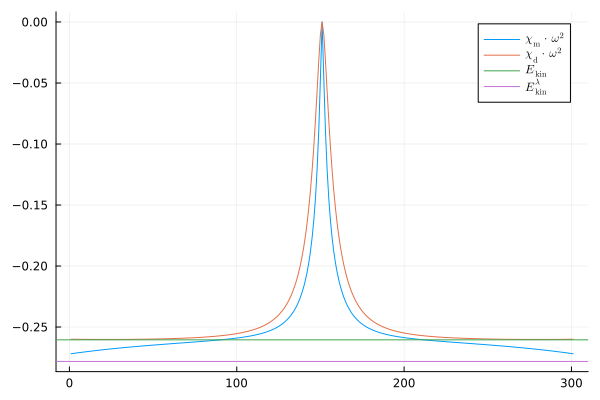

In [28]:
χm_λ = χ_λ(χm, res_dm.λm)
χd_λ = χ_λ(χd, res_dm.λd);
χ_Ekin_2_m = kintegrate(lDGAhelper.kG, χm_λ, 1)[1,:];
χ_Ekin_2_d = kintegrate(lDGAhelper.kG, χd_λ, 1)[1,:];
plot(χ_Ekin_2_m .* ω2, label=L"\chi_\mathrm{m} \cdot \omega^2")
plot!(χ_Ekin_2_d .* ω2, label=L"\chi_\mathrm{d} \cdot \omega^2")
hline!([lDGAhelper.mP.Ekin_1Pt], label=L"E_\mathrm{kin}")
hline!([res_dm.EKin_p1], label=L"E^{\lambda}_\mathrm{kin}")

In [29]:
res_dm_sc =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03240224, λd = -0.99672097, μ = 0.29118053                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07780573,  Epot_2  =  0.07780572,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27125434,  Ekin_2  = -0.26047556,  Δ = 2.0271%                 │
│  χ_m    =  0.37600018,  χ_m_loc = 0.38383441,  Δ = 1.0310%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


# EPot Condition

In [30]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 40
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.5}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Wa

In [31]:
se_full_list = []
EP1_full_list = []
EP2_list = []
se_eom_list = []
EP1_eom_list = []
se_plain_list = []
EP1_plain_list = []
se_delta_list = []
EP1_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Full, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    Epot_2 = EPot_p2(χm, χd, λm, λd, lDGAhelper.mP.n, lDGAhelper.mP.U, lDGAhelper.kG)
    push!(se_full_list,se_tmp)
    push!(EP1_full_list,Epot_1)
    push!(EP2_list,Epot_2)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_plain_list,se_tmp)
    push!(EP1_eom_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_EoM, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_eom_list,se_tmp)
    push!(EP1_plain_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_ExpStep{0.5}, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_delta_list,se_tmp)
    push!(EP1_delta_list,Epot_1)
end

InterruptException: InterruptException:

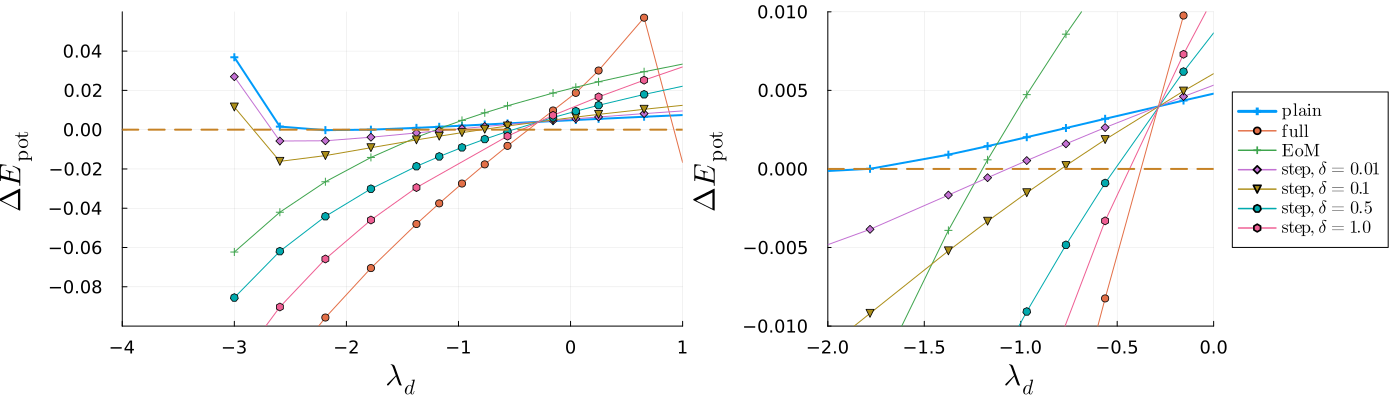

In [32]:
p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.1,.06), xlims=(-4,1), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.01,.01), xlims=(-2,0), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_mu04.pdf")
display(p)

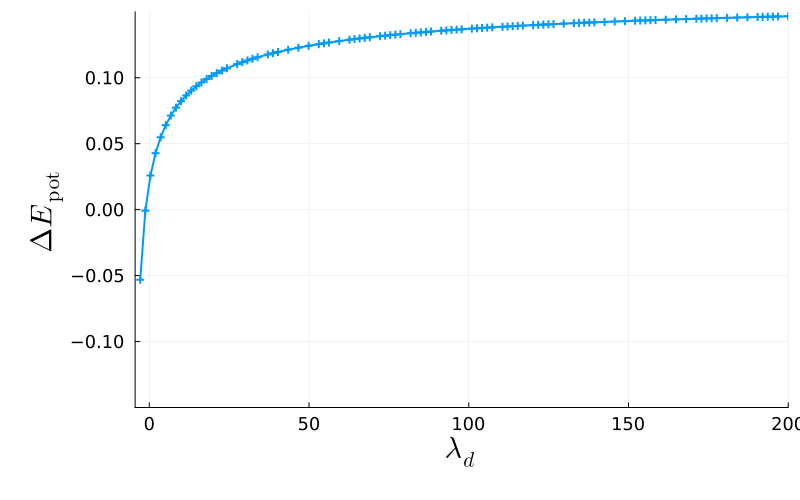

In [33]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 200.0
Nit = 100
xr_dm_full, fr_dm_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);
plot(xr_dm_full, fr_dm_full,size=(800,500), linewidth=2, ylims=(-.15,.15), xlims=(λd_min_sample,λd_max), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)

In [34]:
include(joinpath(@__DIR__,"RootsTests.jl"))

LoadError: LoadError: ArgumentError: Package ForwardDiff not found in current path.
- Run `import Pkg; Pkg.add("ForwardDiff")` to install the ForwardDiff package.
in expression starting at G:\Codes\LadderDGA.jl\notebooks\RootsTests.jl:2

In [35]:
#@timeit to "newtonRF" λdm_correction_val_testRF(χm,γm,χd, γd,λ₀, lDGAhelper; δλd=1e-1, eps = 1e-8)

@timeit to "newtonReset" λdm_correction_val_test(χm,γm,χd, γd,λ₀, lDGAhelper;  δλd=1e-1, fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

@timeit to "newtonSecular" λdm_correction_val_testTF(χm,γm,χd, γd,λ₀, lDGAhelper;  δλd=1e-1, validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition())]#,
               # ("LithBoonkkampIJzermanBracket",Roots.LithBoonkkampIJzermanBracket()),("BracketedHalley",Roots.BracketedHalley()),("BracketedChebyshev",Roots.BracketedChebyshev()),("BracketedSchroder",Roots.BracketedSchroder())] 
for el in methodList
    try
        @timeit to el[1] λdm_correction_val_MethodTest(el[2], χm,γm,χd, γd,λ₀, lDGAhelper; δλd=1e-1 , fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)
    catch e
        println("method $(el[1]) failed with $e")
    end
end


LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [36]:
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=.1)
ωn2_tail = ω2_tail(χm)
@timeit to "newtonReset" t = λm_correction_val_reset(χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8, max_steps =100)
println(t)
@timeit to "newtonSecular" t = λm_correction_val_secular(χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8)
println(t)
methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition())]#,
               # ("LithBoonkkampIJzermanBracket",Roots.LithBoonkkampIJzermanBracket()),("BracketedHalley",Roots.BracketedHalley()),("BracketedChebyshev",Roots.BracketedChebyshev()),("BracketedSchroder",Roots.BracketedSchroder())] 
for el in methodList
    try
        @timeit to el[1] t = λm_correction_val_MethodTest(el[2],χm, rhs, lDGAhelper.kG, ωn2_tail;  δλ=1e-1,eps = 1e-8)
        println(t)
    catch e
        println("method $(el[1]) failed with $e")
    end
end


LoadError: UndefVarError: `ω2_tail` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [37]:
to

LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [38]:
A42                    151ms     12
newtonReset            103ms     24
Bisection              101ms     32
AlefeldPotraShi        36.5ms    11
ITP                    34.2ms    19
Ridders                32.0ms    14
Brent                  31.3ms     9 
FalsePosition          27.2ms     7
Chandrapatla           25.0ms    12
newtonSecular          24.0ms    10

LoadError: UndefVarError: `A42` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Roots in the current active module Main

In [39]:
λd_i = -4.428666997669956
λdmin=get_λ_min(χd)
λmmin=get_λ_min(χm)

χ_λ!(χd,λd_i)
λdmin2=get_λ_min(χd)
reset!(χd)
println("λmmin = $λmmin, λdmin = $λdmin, λdmin2 = $λdmin2")

LoadError: UndefVarError: `get_λ_min` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [40]:
λd_i = -4.35 #428666997669956
xr_m_01, fr_m_01 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd, γd,λ₀, lDGAhelper; feps_abs=1e-12, xeps_abs=1e-12, maxit=3000, 
                    λmin=λmmin, λmax=10.5, verbose = false)

xr_m_02, fr_m_02 = LadderDGA.LambdaCorrection.PPCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; λd=λd_i, feps_abs=1e-12, xeps_abs=1e-12, maxit=3000, 
                    λmin=λmmin, λmax=10.5, verbose = false)

rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper; λd=λd_i)
ωn2_tail = ω2_tail(χm)
λm_i   = λm_correction_val(χm, rhs_c1, lDGAhelper.kG, ωn2_tail;)

LoadError: UndefVarError: `λmmin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [41]:
λd_min_sample = λdmin
λd_max = 0.0
Nit = 200
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

LoadError: UndefVarError: `λdmin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [42]:
p1 = plot(xr_dm_01, fr_dm_01, xlabel=L"\lambda_\mathrm{d}", label=L"E^{(1)}_\mathrm{pot}- E^{(2)}_\mathrm{pot}", 
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12,left_margin = 10mm, bottom_margin=10mm)
vline!([λdmin], lw=2, ls=:dash, label=L"\lambda_{\mathrm{d},\mathrm{min}}")
vline!([λdmin_new], lw=2, ls=:dash, label=L"\lambda_{\mathrm{d},\mathrm{min2}}")
savefig("lambda_min_cmp.pdf")
display(p1)

LoadError: UndefVarError: `λdmin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [43]:
to

LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [44]:
reset_timer!(to)

LoadError: UndefVarError: `to` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [12]:
using OffsetArrays, TimerOutputs, FiniteDiff, LinearAlgebra
using ForwardDiff
using Roots
λ₀T = LadderDGA.λ₀T
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
ω2_tail= LadderDGA.ω2_tail
iν_array = LadderDGA.iν_array
tail_factor = LadderDGA.tail_factor
tail_correction_term = LadderDGA.tail_correction_term
get_λ_min = LadderDGA.LambdaCorrection.get_λ_min
newton_right = LadderDGA.LambdaCorrection.newton_right
λm_rhs = LadderDGA.LambdaCorrection.λm_rhs
λm_correction_val = LadderDGA.LambdaCorrection.λm_correction_val
calc_G_Σ! = LadderDGA.calc_G_Σ!
to = LadderDGA.to
newton_secular = LadderDGA.LambdaCorrection.newton_secular

function newton_right_test(f::Function, start::Float64, min::Float64; nsteps::Int=100, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    df(x) = FiniteDiff.finite_difference_derivative(f, x, typeof(Val(:forward)), Float64)
    newton_right_test(f, df, start, min; nsteps = nsteps, atol = atol, δ = δ, verbose=verbose)
end

function newton_right_test(f::Function, df::Function, start::Float64, min::Float64; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    done  = false
    xlast = start + δ
    xi    = xlast
    i     = 1
    while !done
        fi = f(xi)
        dfii = 1 / df(xi)
        xi = xlast - dfii * fi
        # Found solution in the correct interval
        (norm(fi) < atol) && (xi > min) && break
        # only ever search to the right! bisect instead
        if xi < min
            xi = norm(xlast - (min + δ))/2 +  (min + δ)
        else
            xlast = xi
        end
        (i >= nsteps) && (done = true)
        verbose && println("i = $i, xi = $xi, f(xi) = $fi")
        i += 1
    end
    println("nsteps = ", i-1)
    return xi
end

function λdm_correction_val_testTF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_secular(f_c2, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
    println("Method: Secular. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_test(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end
    
    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_right_test(f_c2, λd_min+20.0, λd_min, verbose=false, nsteps=max_steps_dm, atol=validation_threshold, δ=1e-3)
    println("Method: Reset. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_MethodTest(method, χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0

    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    println(f_c2(λd_min + 1e-4), " ::: ", f_c2(200.0))
    λd  = find_zero(f_c2, (λd_min + 1e-4,200.0), method; atol=validation_threshold, maxiters=max_steps_dm)
    println("Method: $method. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end


LoadError: ArgumentError: Package ForwardDiff not found in current path.
- Run `import Pkg; Pkg.add("ForwardDiff")` to install the ForwardDiff package.